In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import acquire
import prepare
import env

Part I
Do these exercises in explore.ipynb notebook. As always, add, commit, and push your changes.

Section 1 - iris_db: Using iris data from our MySQL server and the methods used in the lesson above:

1. Acquire, prepare & split your data.

In [4]:
#acquire the data using acquire file function
df = acquire.get_iris_data()

this file exists, reading from csv


In [5]:
#looking at data
df.head()

,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,setosa,2,4.9,3.0,1.4,0.2
2,1,setosa,3,4.7,3.2,1.3,0.2
3,1,setosa,4,4.6,3.1,1.5,0.2
4,1,setosa,5,5.0,3.6,1.4,0.2


In [6]:
df.describe()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,2.000000,75.500000,5.843333,3.057333,3.758000,1.199333
std,0.819232,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,1.000000,4.300000,2.000000,1.000000,0.100000
25%,1.000000,38.250000,5.100000,2.800000,1.600000,0.300000
50%,2.000000,75.500000,5.800000,3.000000,4.350000,1.300000
75%,3.000000,112.750000,6.400000,3.300000,5.100000,1.800000
max,3.000000,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.dtypes

species_id          int64
species_name       object
measurement_id      int64
sepal_length      float64
sepal_width       float64
petal_length      float64
petal_width       float64
dtype: object

In [8]:
#clean my data using function from prepare file
df = prepare.prep_iris(df)

In [9]:
df.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


In [10]:
#split data using function from prepare file
train, validate, test = prepare.split_iris(df)

In [11]:
train.shape

(90, 5)

In [12]:
validate.shape

(30, 5)

In [13]:
test.shape

(30, 5)

In [14]:
#make sure to only use train data
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width
24,setosa,4.8,3.4,1.9,0.2
147,virginica,6.5,3.0,5.2,2.0
88,versicolor,5.6,3.0,4.1,1.3
123,virginica,6.3,2.7,4.9,1.8
31,setosa,5.4,3.4,1.5,0.4


2. Univariate Stats

For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [15]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,90.000000,90.000000,90.000000,90.000000
mean,5.781111,3.023333,3.728889,1.191111
std,0.792081,0.434741,1.710526,0.757679
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.725000,1.600000,0.325000
50%,5.700000,3.000000,4.200000,1.300000
75%,6.300000,3.375000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
#intializing empty lists
cat_col = []
con_col = []

#looping through all my columns
for col in df.columns:
    
    #finding all my string columns
    print(col)
    print(df[col].dtype)
    if df[col].dtype == 'object':
        print('this is a string variable')
        cat_col.append(col)
    else:
        print('this is a number')
        
        #check for how many unique values
        print(df[col].nunique())
        if df[col].nunique() < 10:
            print('treat as categorical variable')
            cat_col.append(col)
        else: 
            #if it has more than 10 unique values, append to continous column variable
            con_col.append(col)
    print()

species
object
this is a string variable

sepal_length
float64
this is a number
35

sepal_width
float64
this is a number
23

petal_length
float64
this is a number
43

petal_width
float64
this is a number
22



species
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64
species
setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


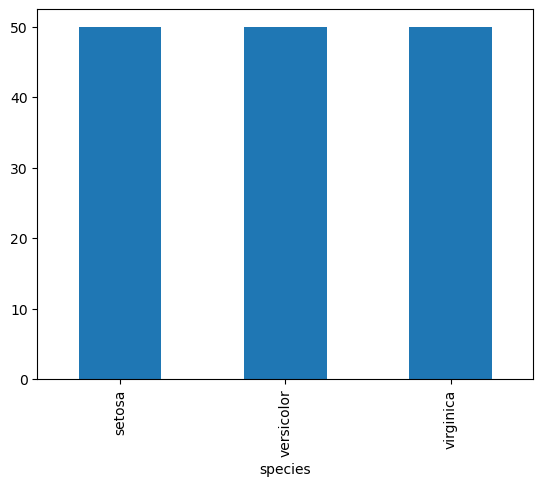

In [17]:
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True))
    print(df[col].value_counts().sort_index().plot.bar())
    plt.show()
    print()

sepal_length
sepal_length
(4.295, 5.02]    32
(5.02, 5.74]     41
(5.74, 6.46]     42
(6.46, 7.18]     24
(7.18, 7.9]      11
Name: count, dtype: int64


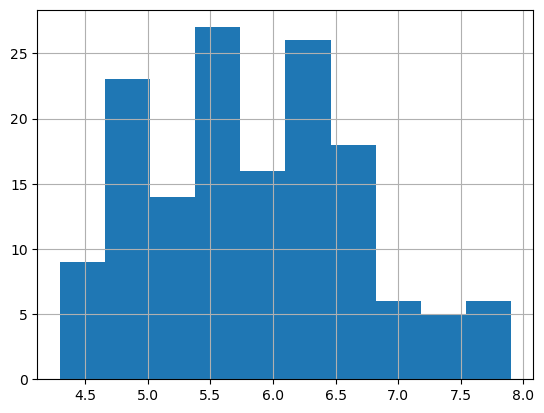

sepal_width
sepal_width
(1.997, 2.48]    11
(2.48, 2.96]     46
(2.96, 3.44]     68
(3.44, 3.92]     21
(3.92, 4.4]       4
Name: count, dtype: int64


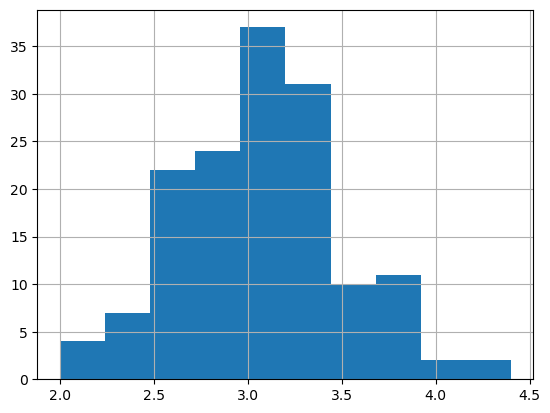

petal_length
petal_length
(0.993, 2.18]    50
(2.18, 3.36]      3
(3.36, 4.54]     34
(4.54, 5.72]     47
(5.72, 6.9]      16
Name: count, dtype: int64


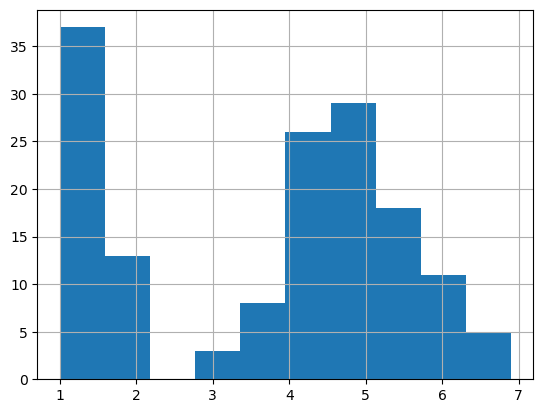

petal_width
petal_width
(0.0966, 0.58]    49
(0.58, 1.06]       8
(1.06, 1.54]      41
(1.54, 2.02]      29
(2.02, 2.5]       23
Name: count, dtype: int64


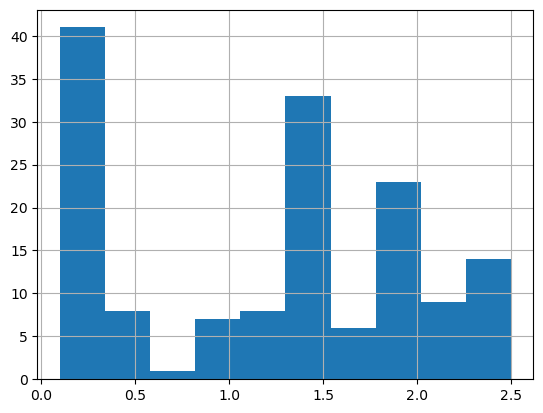

In [18]:
for col in con_col:
    print(col)
    print(df[col].value_counts(bins=5).sort_index())
    df[col].hist()
    plt.show()

<Axes: xlabel='species', ylabel='sepal_length'>

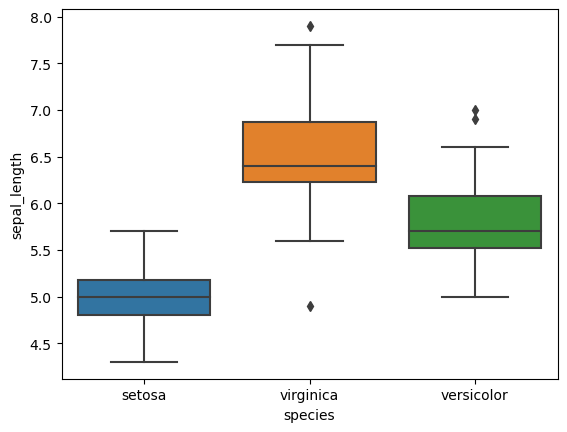

In [19]:
sns.boxplot(data=train, x='species', y='sepal_length')

<Axes: xlabel='species', ylabel='sepal_width'>

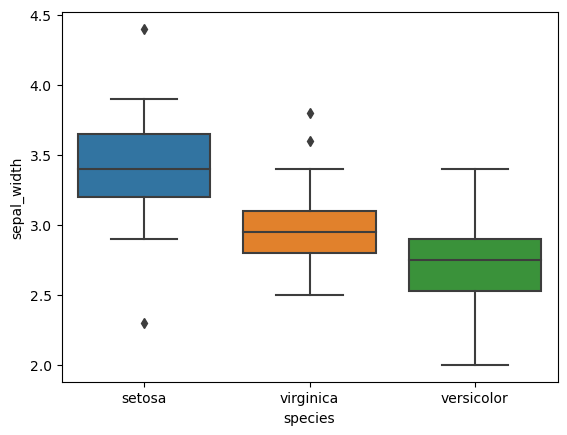

In [20]:
sns.boxplot(data=train, x='species', y='sepal_width')

<Axes: xlabel='species', ylabel='petal_length'>

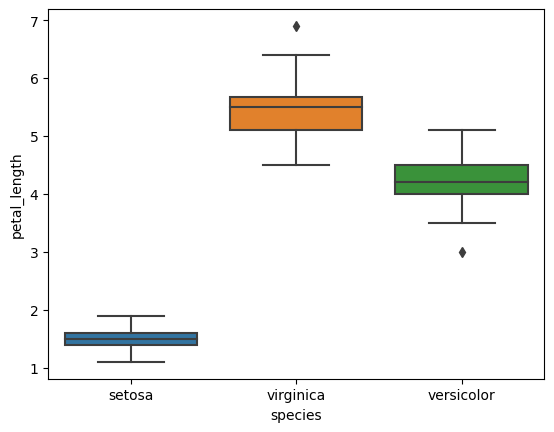

In [21]:
sns.boxplot(data=train, x='species', y='petal_length')

<Axes: xlabel='species', ylabel='petal_width'>

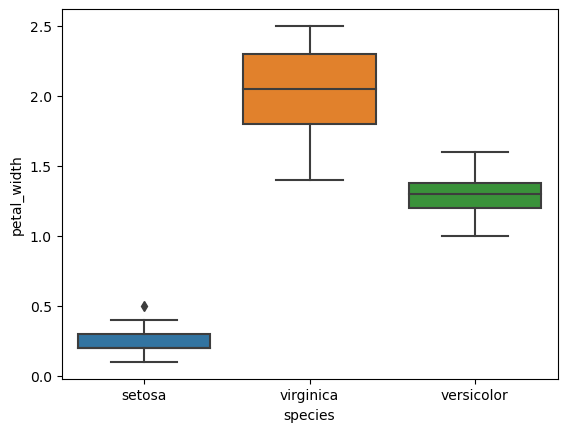

In [22]:
sns.boxplot(data=train, x='species', y='petal_width')

For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

Document takeaways & any actions.

The boxplots for each variable make it clear that:
virginica species is the biggest in 3 out of 4 categories.
versicolor is second biggest in 3 out of 4 categories.
setosa is smallest in 3 out of 4 categories.

(petal width, petal length, sepal length) (sepal width is only inconsistent variable)

3. Bivariate Stats

Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

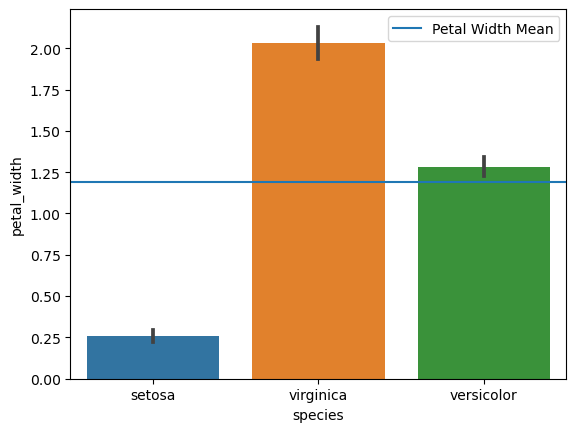

In [23]:
sns.barplot(data=train, x='species', y='petal_width')
petal_width_mean = train.petal_width.mean()
plt.axhline(petal_width_mean, label="Petal Width Mean")
plt.legend()
plt.show()

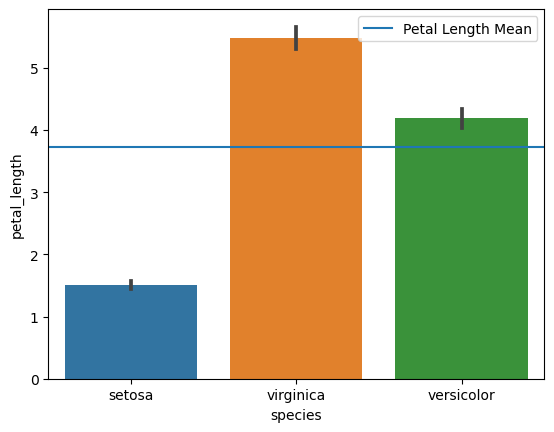

In [24]:
sns.barplot(data=train, x='species', y='petal_length')
petal_length_mean = train.petal_length.mean()
plt.axhline(petal_length_mean, label="Petal Length Mean")
plt.legend()
plt.show()

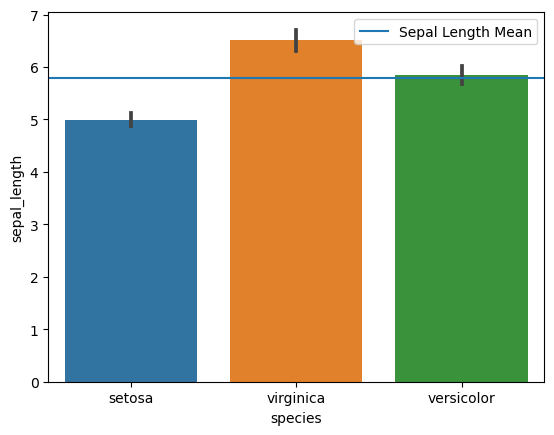

In [25]:
sns.barplot(data=train, x='species', y='sepal_length')
sepal_length_mean = train.sepal_length.mean()
plt.axhline(sepal_length_mean, label="Sepal Length Mean")
plt.legend()
plt.show()

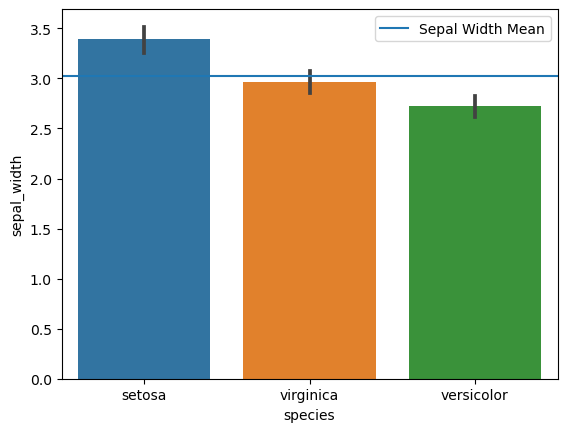

In [26]:
sns.barplot(data=train, x='species', y='sepal_width')
sepal_width_mean = train.sepal_width.mean()
plt.axhline(sepal_width_mean, label="Sepal Width Mean")
plt.legend()
plt.show()

For each measurement type, compute the descriptive statistics for each species.

In [27]:
train.groupby('species').describe()

sepal_length                                                   \
                  count      mean       std  min    25%  50%    75%  max   
species                                                                    
setosa             30.0  4.993333  0.354219  4.3  4.800  5.0  5.175  5.7   
versicolor         30.0  5.843333  0.478996  5.0  5.525  5.7  6.075  7.0   
virginica          30.0  6.506667  0.616404  4.9  6.225  6.4  6.875  7.9   

           sepal_width        ... petal_length      petal_width            \
                 count  mean  ...          75%  max       count      mean   
species                       ...                                           
setosa            30.0  3.39  ...        1.600  1.9        30.0  0.256667   
versicolor        30.0  2.72  ...        4.500  5.1        30.0  1.283333   
virginica         30.0  2.96  ...        5.675  6.9        30.0  2.033333   

                                                  
                 std  min  25%   50%    75%  max  
species                                           
setosa      0.100630  0.1  0.2  0.20  0.300  0.5  
versicolor  0.170361  1.0  1.2  1.30  1.375  1.6  
virginica   0.277095  1.4  1.8  2.05  2.300  2.5  

[3 rows x 32 columns]

For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [28]:
vi_pw = train.petal_width[train.species == 'virginica'].mean()

In [29]:
ve_pw = train.petal_width[train.species == 'versicolor'].mean()

In [30]:
from scipy.stats import mannwhitneyu
U1, p = mannwhitneyu(vi_pw, ve_pw, method="auto")
print(U1)

1.0


Document takeaways & any actions.

4. Multivariate Stats

Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

In [31]:
iris = sns.load_dataset("iris")

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


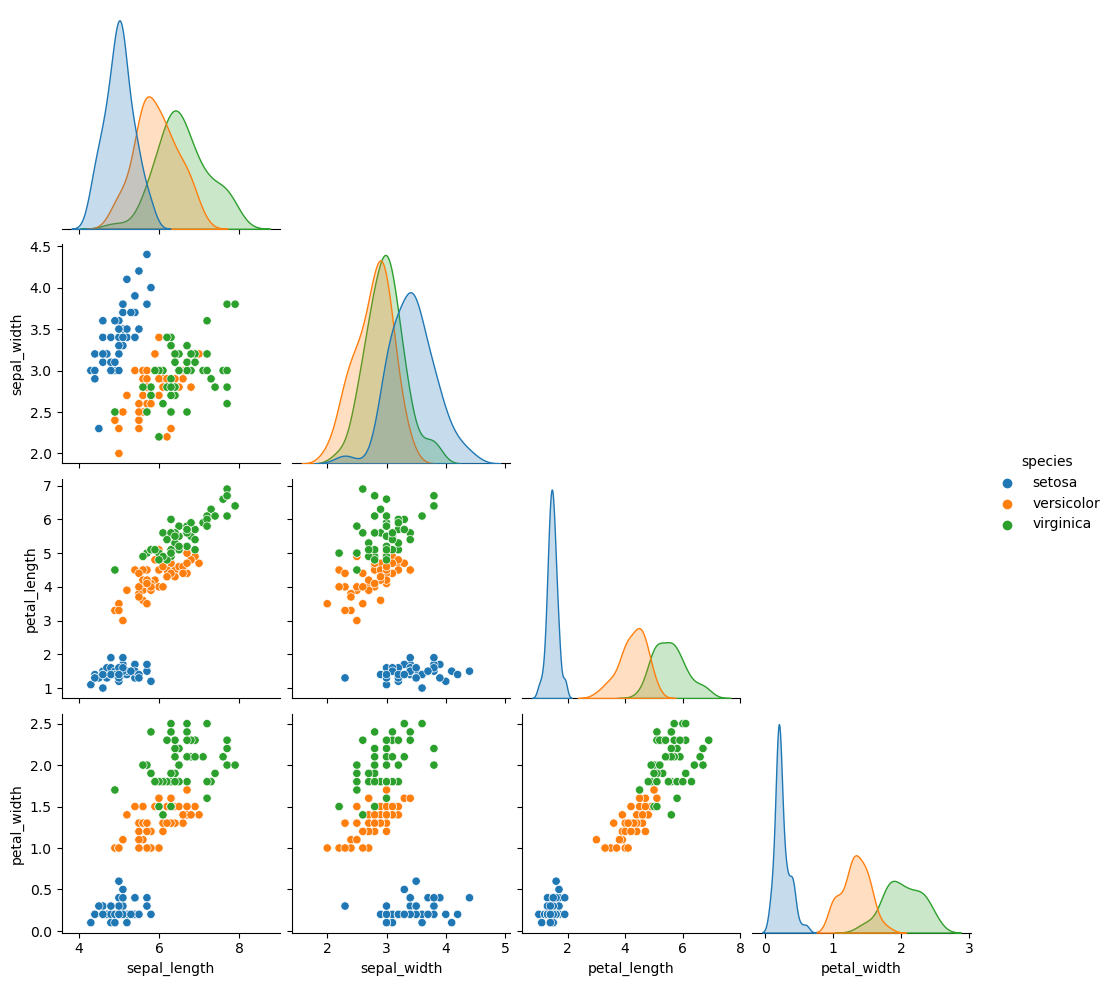

In [32]:
sns.pairplot(iris, corner=True,hue='species');

Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


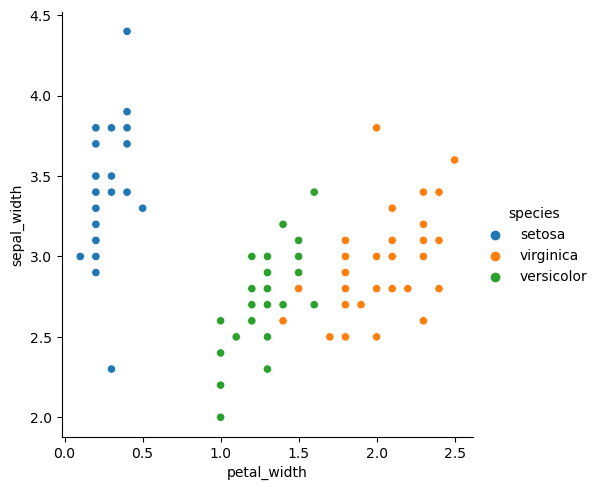

In [33]:
sns.relplot(x='petal_width', y='sepal_width', data=train, hue='species');

Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).


Question: Is the petal area larger for the virginica compared to versicolor?

$H_o$ = virginica petal area is not larger compared to versicolor.

$H_o$ = virginica petal area is larger compared to versicolor.

In [34]:
train['petal_area'] = train.petal_length * train.petal_width

In [35]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,petal_area
24,setosa,4.8,3.4,1.9,0.2,0.38
147,virginica,6.5,3.0,5.2,2.0,10.40
88,versicolor,5.6,3.0,4.1,1.3,5.33
123,virginica,6.3,2.7,4.9,1.8,8.82
31,setosa,5.4,3.4,1.5,0.4,0.60


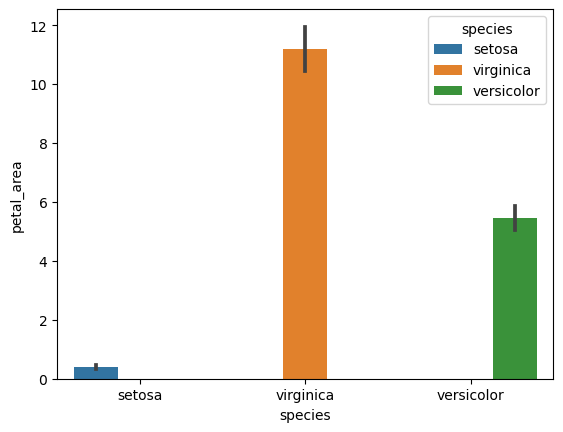

In [36]:
sns.barplot(x='species', y='petal_area', data=train, hue='species');

In [37]:
virginica_p_area = train.petal_area[train.species == 'virginica']

In [38]:
versicolor_p_area = train.petal_area[train.species == 'versicolor']

In [39]:
t_stat, p = stats.ttest_ind(virginica_p_area,
                            versicolor_p_area,
                            equal_var=True)    

In [40]:
t_stat

13.190369508403219

In [41]:
p

4.163657696673762e-19

Document takeaways and any actions.

We fail to reject the null hypothesis

We conclude that virginica's petal area is larger than versicolor's petal area.

Part III
Explore your telco data to discover drivers of churn

In [42]:
df = acquire.get_telco_data()

this file exists, reading from csv


In [43]:
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [44]:
df = prepare.prep_telco(df)

Determine if certain columns should be dropped

In [45]:
cat_col = []
con_col = []

#looping through all my columns
for col in df.columns:
    
    #finding all my string columns
    print(col)
    print(df[col].dtype)
    if df[col].dtype == 'object':
        print('this is a string variable')
        cat_col.append(col)
    else:
        print('this is a number')
        
        #check for how many unique values
        print(df[col].nunique())
        if df[col].nunique() < 10:
            print('treat as categorical variable')
            cat_col.append(col)
        else: 
            #if it has more than 10 unique values, append to continous column variable
            con_col.append(col)
    print()

customer_id
object
this is a string variable

gender
object
this is a string variable

senior_citizen
int64
this is a number
2
treat as categorical variable

partner
object
this is a string variable

dependents
object
this is a string variable

tenure
int64
this is a number
73

phone_service
object
this is a string variable

multiple_lines
object
this is a string variable

online_security
object
this is a string variable

online_backup
object
this is a string variable

device_protection
object
this is a string variable

tech_support
object
this is a string variable

streaming_tv
object
this is a string variable

streaming_movies
object
this is a string variable

paperless_billing
object
this is a string variable

monthly_charges
float64
this is a number
1585

total_charges
object
this is a string variable

churn
object
this is a string variable

contract_type
object
this is a string variable

internet_service_type
object
this is a string variable

payment_type
object
this is a string v

Determine if it would be valuable to bin some numeric columns

customer_id
customer_id
0002-ORFBO    1
6616-AALSR    1
6625-UTXEW    1
6625-IUTTT    1
6625-FLENO    1
             ..
3352-RICWQ    1
3352-ALMCK    1
3351-NQLDI    1
3351-NGXYI    1
9995-HOTOH    1
Name: count, Length: 7043, dtype: int64
customer_id
0002-ORFBO    0.000142
6616-AALSR    0.000142
6625-UTXEW    0.000142
6625-IUTTT    0.000142
6625-FLENO    0.000142
                ...   
3352-RICWQ    0.000142
3352-ALMCK    0.000142
3351-NQLDI    0.000142
3351-NGXYI    0.000142
9995-HOTOH    0.000142
Name: proportion, Length: 7043, dtype: float64
Axes(0.125,0.11;0.775x0.77)


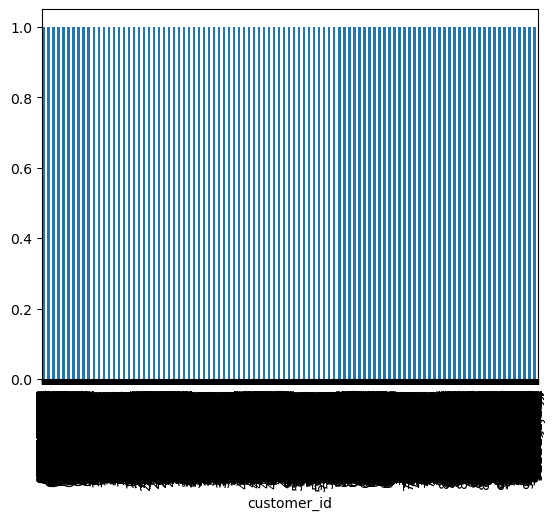


gender
gender
Male      3555
Female    3488
Name: count, dtype: int64
gender
Male      0.504756
Female    0.495244
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


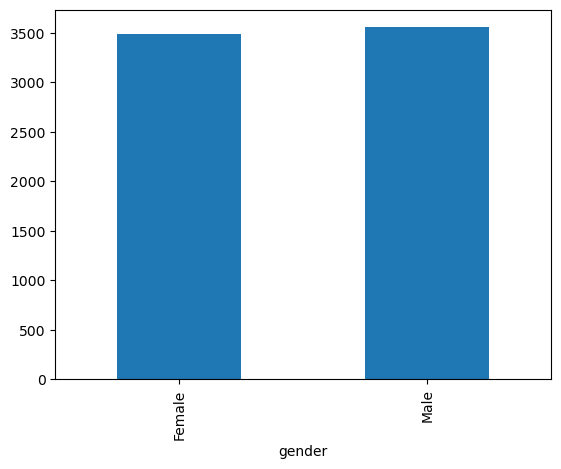


senior_citizen
senior_citizen
0    5901
1    1142
Name: count, dtype: int64
senior_citizen
0    0.837853
1    0.162147
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


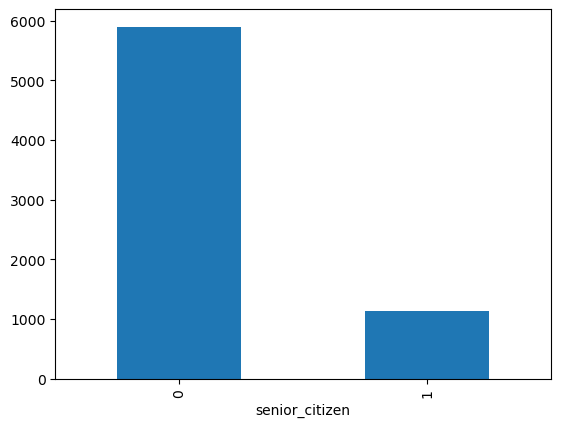


partner
partner
No     3641
Yes    3402
Name: count, dtype: int64
partner
No     0.516967
Yes    0.483033
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


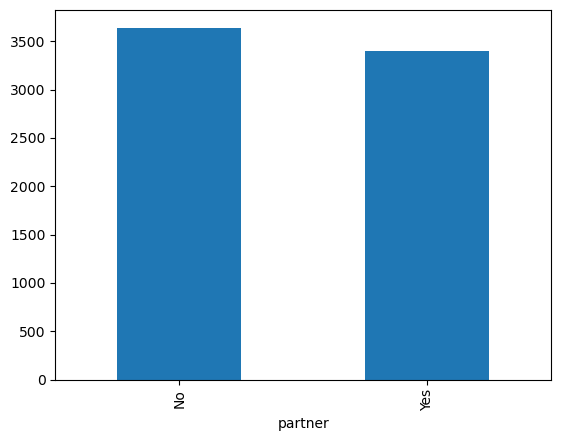


dependents
dependents
No     4933
Yes    2110
Name: count, dtype: int64
dependents
No     0.700412
Yes    0.299588
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


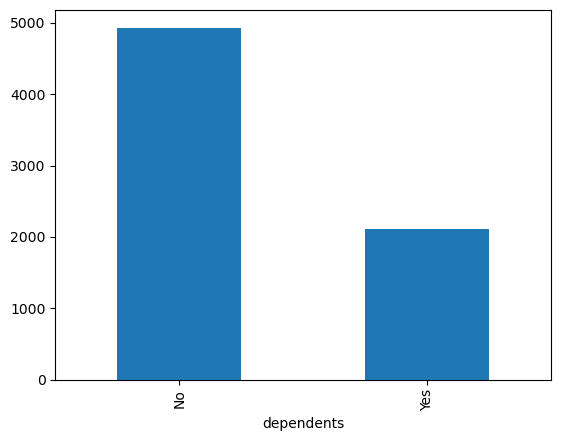


phone_service
phone_service
Yes    6361
No      682
Name: count, dtype: int64
phone_service
Yes    0.903166
No     0.096834
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


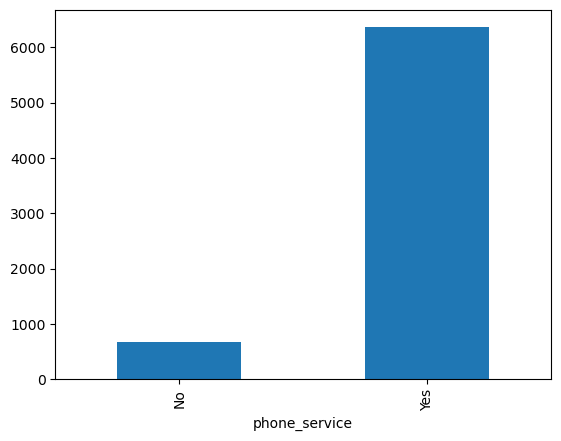


multiple_lines
multiple_lines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
multiple_lines
No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


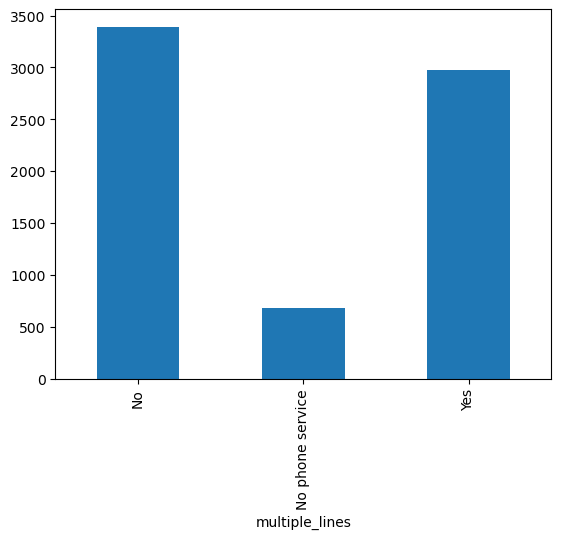


online_security
online_security
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
online_security
No                     0.496663
Yes                    0.286668
No internet service    0.216669
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


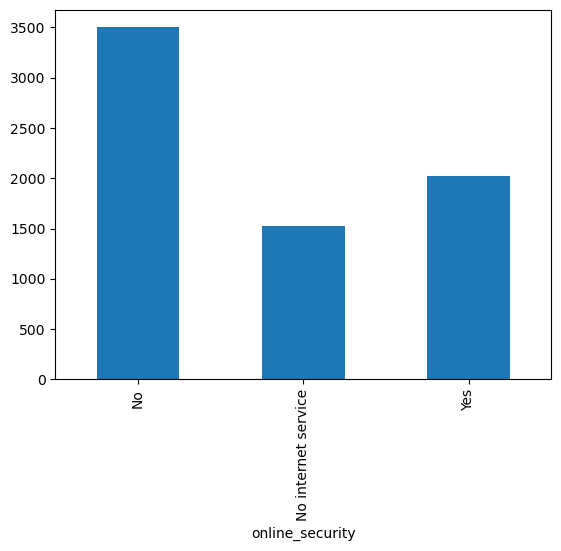


online_backup
online_backup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
online_backup
No                     0.438450
Yes                    0.344881
No internet service    0.216669
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


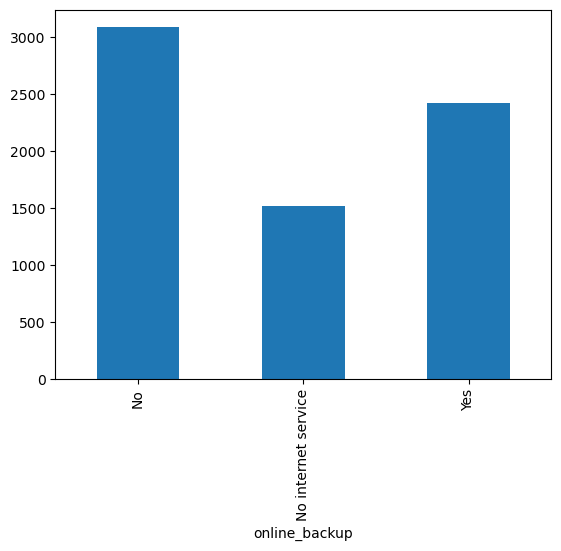


device_protection
device_protection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
device_protection
No                     0.439443
Yes                    0.343888
No internet service    0.216669
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


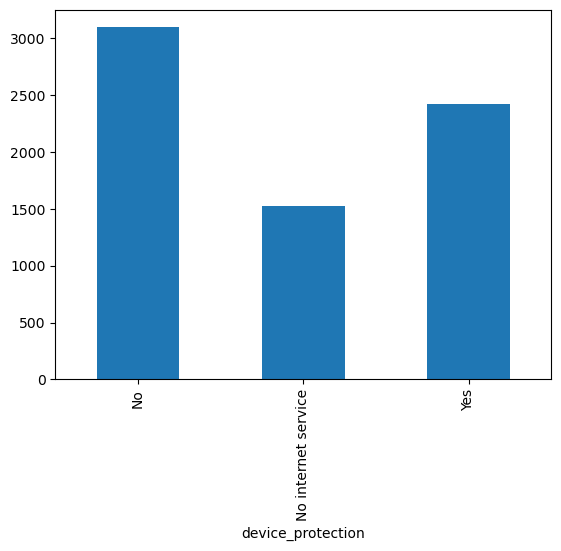


tech_support
tech_support
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64
tech_support
No                     0.493114
Yes                    0.290217
No internet service    0.216669
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


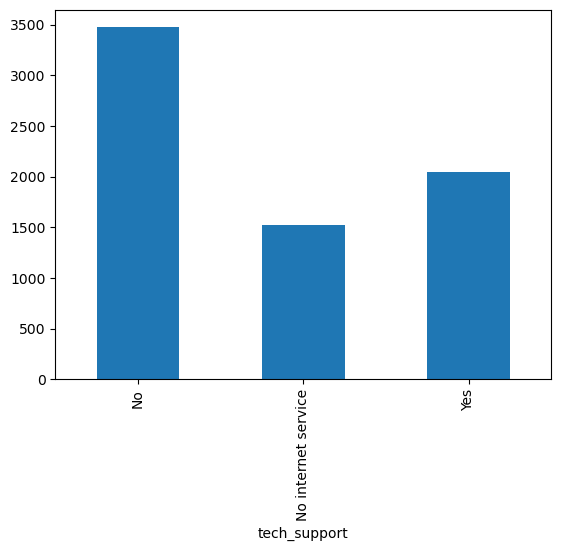


streaming_tv
streaming_tv
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64
streaming_tv
No                     0.398978
Yes                    0.384353
No internet service    0.216669
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


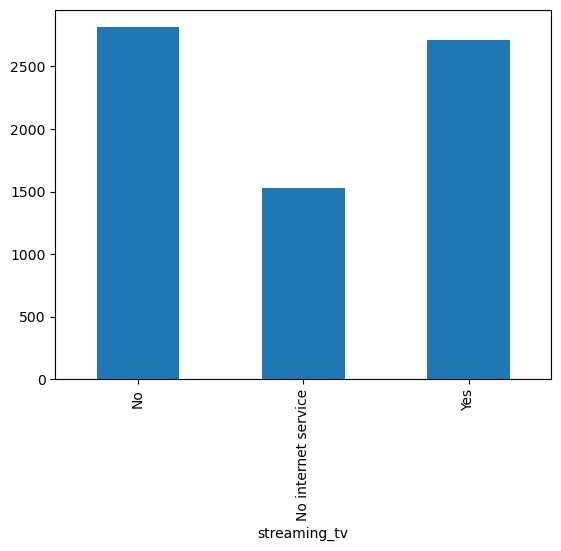


streaming_movies
streaming_movies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64
streaming_movies
No                     0.395428
Yes                    0.387903
No internet service    0.216669
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


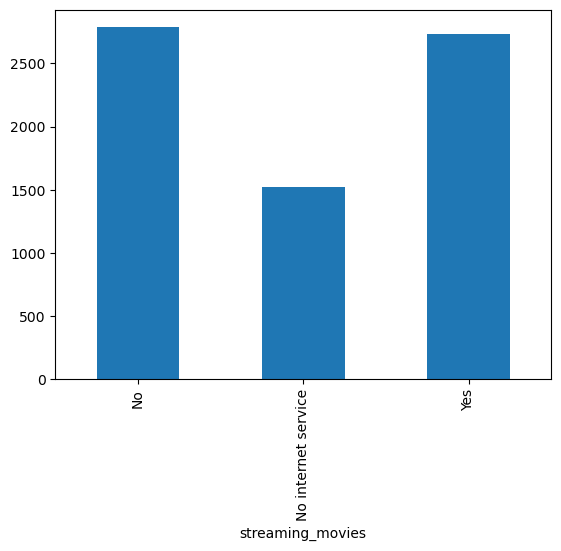


paperless_billing
paperless_billing
Yes    4171
No     2872
Name: count, dtype: int64
paperless_billing
Yes    0.592219
No     0.407781
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


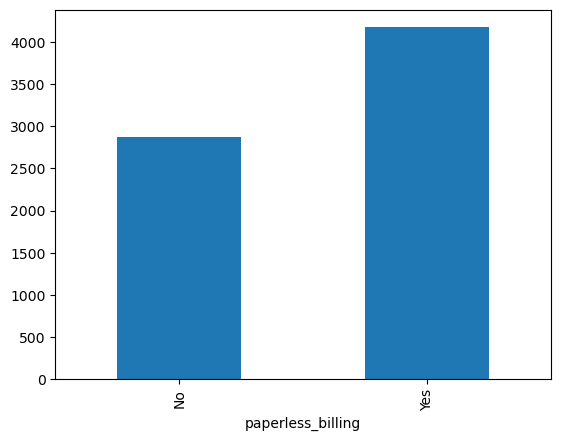


total_charges
total_charges
           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
2387.75     1
6302.8      1
2058.5      1
829.55      1
3707.6      1
Name: count, Length: 6531, dtype: int64
total_charges
           0.001562
20.2       0.001562
19.75      0.001278
19.9       0.001136
20.05      0.001136
             ...   
2387.75    0.000142
6302.8     0.000142
2058.5     0.000142
829.55     0.000142
3707.6     0.000142
Name: proportion, Length: 6531, dtype: float64
Axes(0.125,0.11;0.775x0.77)


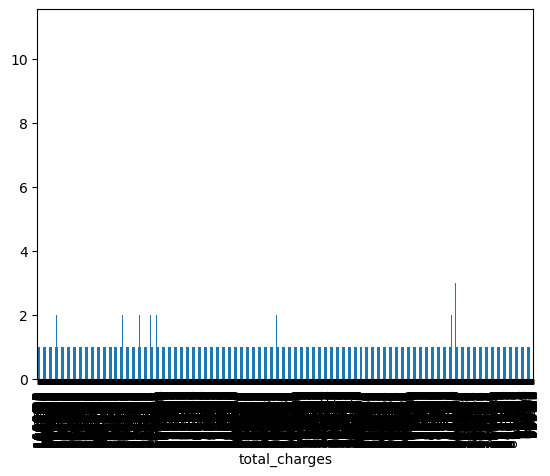


churn
churn
No     5174
Yes    1869
Name: count, dtype: int64
churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


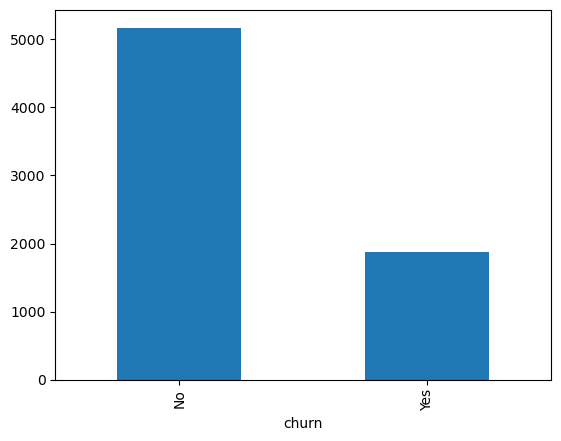


contract_type
contract_type
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64
contract_type
Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


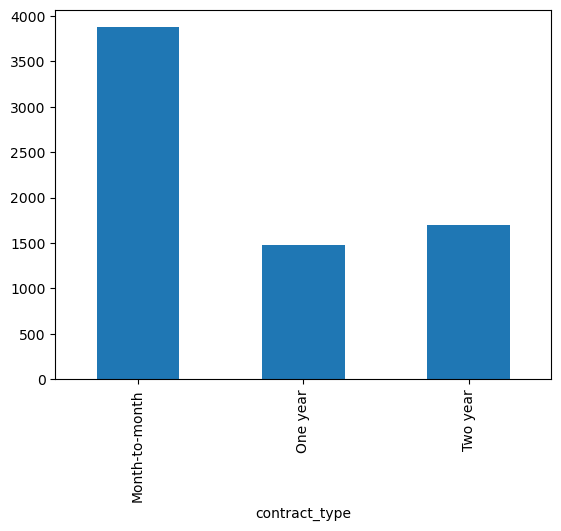


internet_service_type
internet_service_type
Fiber optic    3096
DSL            2421
No Internet    1526
Name: count, dtype: int64
internet_service_type
Fiber optic    0.439585
DSL            0.343746
No Internet    0.216669
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


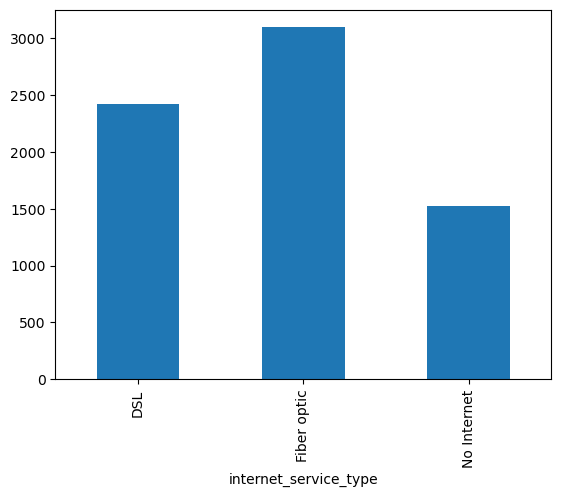


payment_type
payment_type
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64
payment_type
Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


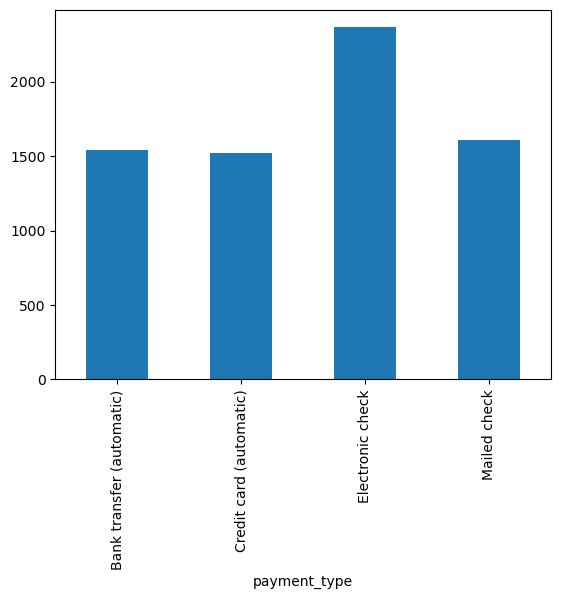

In [46]:
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True))
    print(df[col].value_counts().sort_index().plot.bar())
    plt.show()
    print()

tenure
tenure
(-0.073, 7.2]    1612
(7.2, 14.4]       759
(14.4, 21.6]      570
(21.6, 28.8]      556
(28.8, 36.0]      545
(36.0, 43.2]      444
(43.2, 50.4]      452
(50.4, 57.6]      495
(57.6, 64.8]      501
(64.8, 72.0]     1109
Name: count, dtype: int64


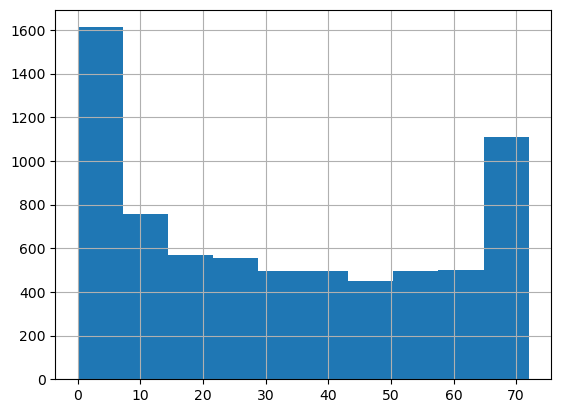

monthly_charges
monthly_charges
(18.148999999999997, 28.3]    1606
(28.3, 38.35]                  191
(38.35, 48.4]                  365
(48.4, 58.45]                  640
(58.45, 68.5]                  474
(68.5, 78.55]                  893
(78.55, 88.6]                  953
(88.6, 98.65]                  873
(98.65, 108.7]                 754
(108.7, 118.75]                294
Name: count, dtype: int64


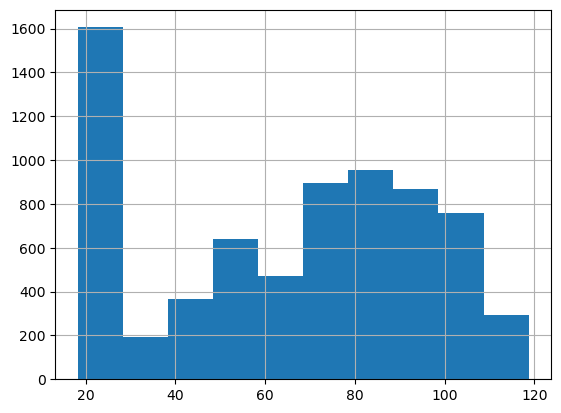

In [45]:
for col in con_col:
    print(col)
    print(df[col].value_counts(bins=10).sort_index())
    df[col].hist()
    plt.show()

In [47]:
train, validate, test = prepare.splitting_data(df, 'churn')

In [50]:
train.shape

(4225, 21)

In [51]:
validate.shape

(1409, 21)

In [52]:
test.shape

(1409, 21)

Determine if it would be valuable to combine multiple columns into one.

What are your drivers of churn?

Q: Does monthly charges affect churn?

In [53]:
test.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
4930,6941-KXRRV,Female,1,Yes,No,48,Yes,No,No,Yes,...,No,No,Yes,Yes,58.95,2789.7,No,One year,DSL,Bank transfer (automatic)
117,0206-OYVOC,Female,0,Yes,Yes,46,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Yes,19.25,864.2,No,Two year,No Internet,Mailed check
5275,7442-YGZFK,Male,0,No,No,1,Yes,Yes,No,No,...,No,No,No,Yes,49.80,49.8,No,Month-to-month,DSL,Credit card (automatic)
6364,9018-PCIOK,Female,0,No,No,55,Yes,No,No,Yes,...,No,No,Yes,Yes,64.75,3617.1,No,Two year,DSL,Mailed check
1092,1591-MQJTP,Male,1,Yes,No,51,Yes,Yes,Yes,No,...,No,No,Yes,Yes,93.65,4839.15,No,One year,Fiber optic,Bank transfer (automatic)


In [67]:
test.dtypes

customer_id               object
gender                    object
senior_citizen             int64
partner                   object
dependents                object
tenure                     int64
phone_service             object
multiple_lines            object
online_security           object
online_backup             object
device_protection         object
tech_support              object
streaming_tv              object
streaming_movies          object
paperless_billing         object
monthly_charges          float64
total_charges             object
churn                     object
contract_type             object
internet_service_type     object
payment_type              object
dtype: object

In [73]:
train.contract_type.value_counts()

contract_type
Month-to-month    2335
Two year          1011
One year           879
Name: count, dtype: int64

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.